## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [ ]:
your_name = "Rachit Kumar Agrawal"
your_student_id = "48046493"

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

# Loading the CSV File
df = pd.read_csv('car_sell.csv')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [4]:
#Displaying the initial dataframe
print("Initial DataFrame:")
print(df)

#Counting the null values
print("\nCount of null values in each column:")
print(df.isnull().sum())

# Length of data before removing the data
initial_length = len(df)
print(f"\nLength of the data before removing missing data: {initial_length}")

# Removing rows where 'year' is missing or 'fuel' is 'none'
df_cleaned = df.dropna(subset=['year'])
df_cleaned = df_cleaned[df_cleaned['fuel'] != 'none']

# Printing the data frame after removing the records
print("\nCleaned DataFrame:")
print(df_cleaned)

#Printing no. of null values after cleaning the data
print("\nCount of null values in each column after cleaning:")
print(df_cleaned.isnull().sum())

#Printing the length of the data after removing records
final_length = len(df_cleaned)
print(f"\nLength of the data after removing missing data: {final_length}")


Initial DataFrame:
      Unnamed: 0                                 name    year  selling_price  \
0              0                        Maruti 800 AC  2007.0          60000   
1              1             Maruti Wagon R LXI Minor  2007.0         135000   
2              2                 Hyundai Verna 1.6 SX  2012.0         600000   
3              3               Datsun RediGO T Option  2017.0         250000   
4              4                Honda Amaze VX i-DTEC  2014.0         450000   
...          ...                                  ...     ...            ...   
4335        4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014.0         409999   
4336        4336           Hyundai i20 Magna 1.4 CRDi  2014.0         409999   
4337        4337                  Maruti 800 AC BSIII  2009.0         110000   
4338        4338     Hyundai Creta 1.6 CRDi SX Option  2016.0         865000   
4339        4339                     Renault KWID RXT  2016.0         225000   

      km_driven    f

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [17]:
#We know that df_cleaned is the cleaaned data frame from Q1, So we will be using that data frame

#Q2.1 (Total number of unique name, seller_type, transmission, and owner)
unique_name_count = df_cleaned['name'].nunique()
unique_seller_type_count = df_cleaned['seller_type'].nunique()
unique_transmission_count = df_cleaned['transmission'].nunique()
unique_owner_count = df_cleaned['owner'].nunique()

print("Q2.1 Total unique counts:")
print(f"Unique names: {unique_name_count}")
print(f"Unique seller types: {unique_seller_type_count}")
print(f"Unique transmissions: {unique_transmission_count}")
print(f"Unique owners: {unique_owner_count}\n")

#Q2.2 (Descriptive statistics for km_driven)
km_driven_stats = df_cleaned['km_driven'].describe()
print("Q2.2 Descriptive statistics for km_driven:")
print(km_driven_stats, "\n")

#Q2.3 (Group by seller_type and count the number of records under selling_price)
step1_output_q23 = df_filtered.groupby('seller_type')['selling_price'].count()
print("Q2.3 Count of records under selling_price by each seller_type:")
print(step1_output_q23)
step2_output_q23 = step1_output_q23.describe()
print("\nDescriptive statistics for the count of selling_price by seller_type:")
print(step2_output_q23)

#Q2.4 (Descriptive statistics for years sold by owner type)
df_cleaned['years_sold'] = 2024 - df_cleaned['year']

years_sold_stats_by_owner = df_cleaned.groupby('owner')['years_sold'].agg(['mean', 'std', 'min', 'max'])
print("Q2.4 Descriptive statistics for years sold by owner type:")
print(years_sold_stats_by_owner)

Q2.1 Total unique counts:
Unique names: 1402
Unique seller types: 3
Unique transmissions: 2
Unique owners: 5

Q2.2 Descriptive statistics for km_driven:
count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64 

Q2.3 Count of records under selling_price by each seller_type:
seller_type
Dealer         862
Individual    2795
Name: selling_price, dtype: int64

Descriptive statistics for the count of selling_price by seller_type:
count       2.000000
mean     1828.500000
std      1366.837408
min       862.000000
25%      1345.250000
50%      1828.500000
75%      2311.750000
max      2795.000000
Name: selling_price, dtype: float64
Q2.4 Descriptive statistics for years sold by owner type:
                           mean       std  min   max
owner                                               
First Owner            9.546209  3.555597  

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

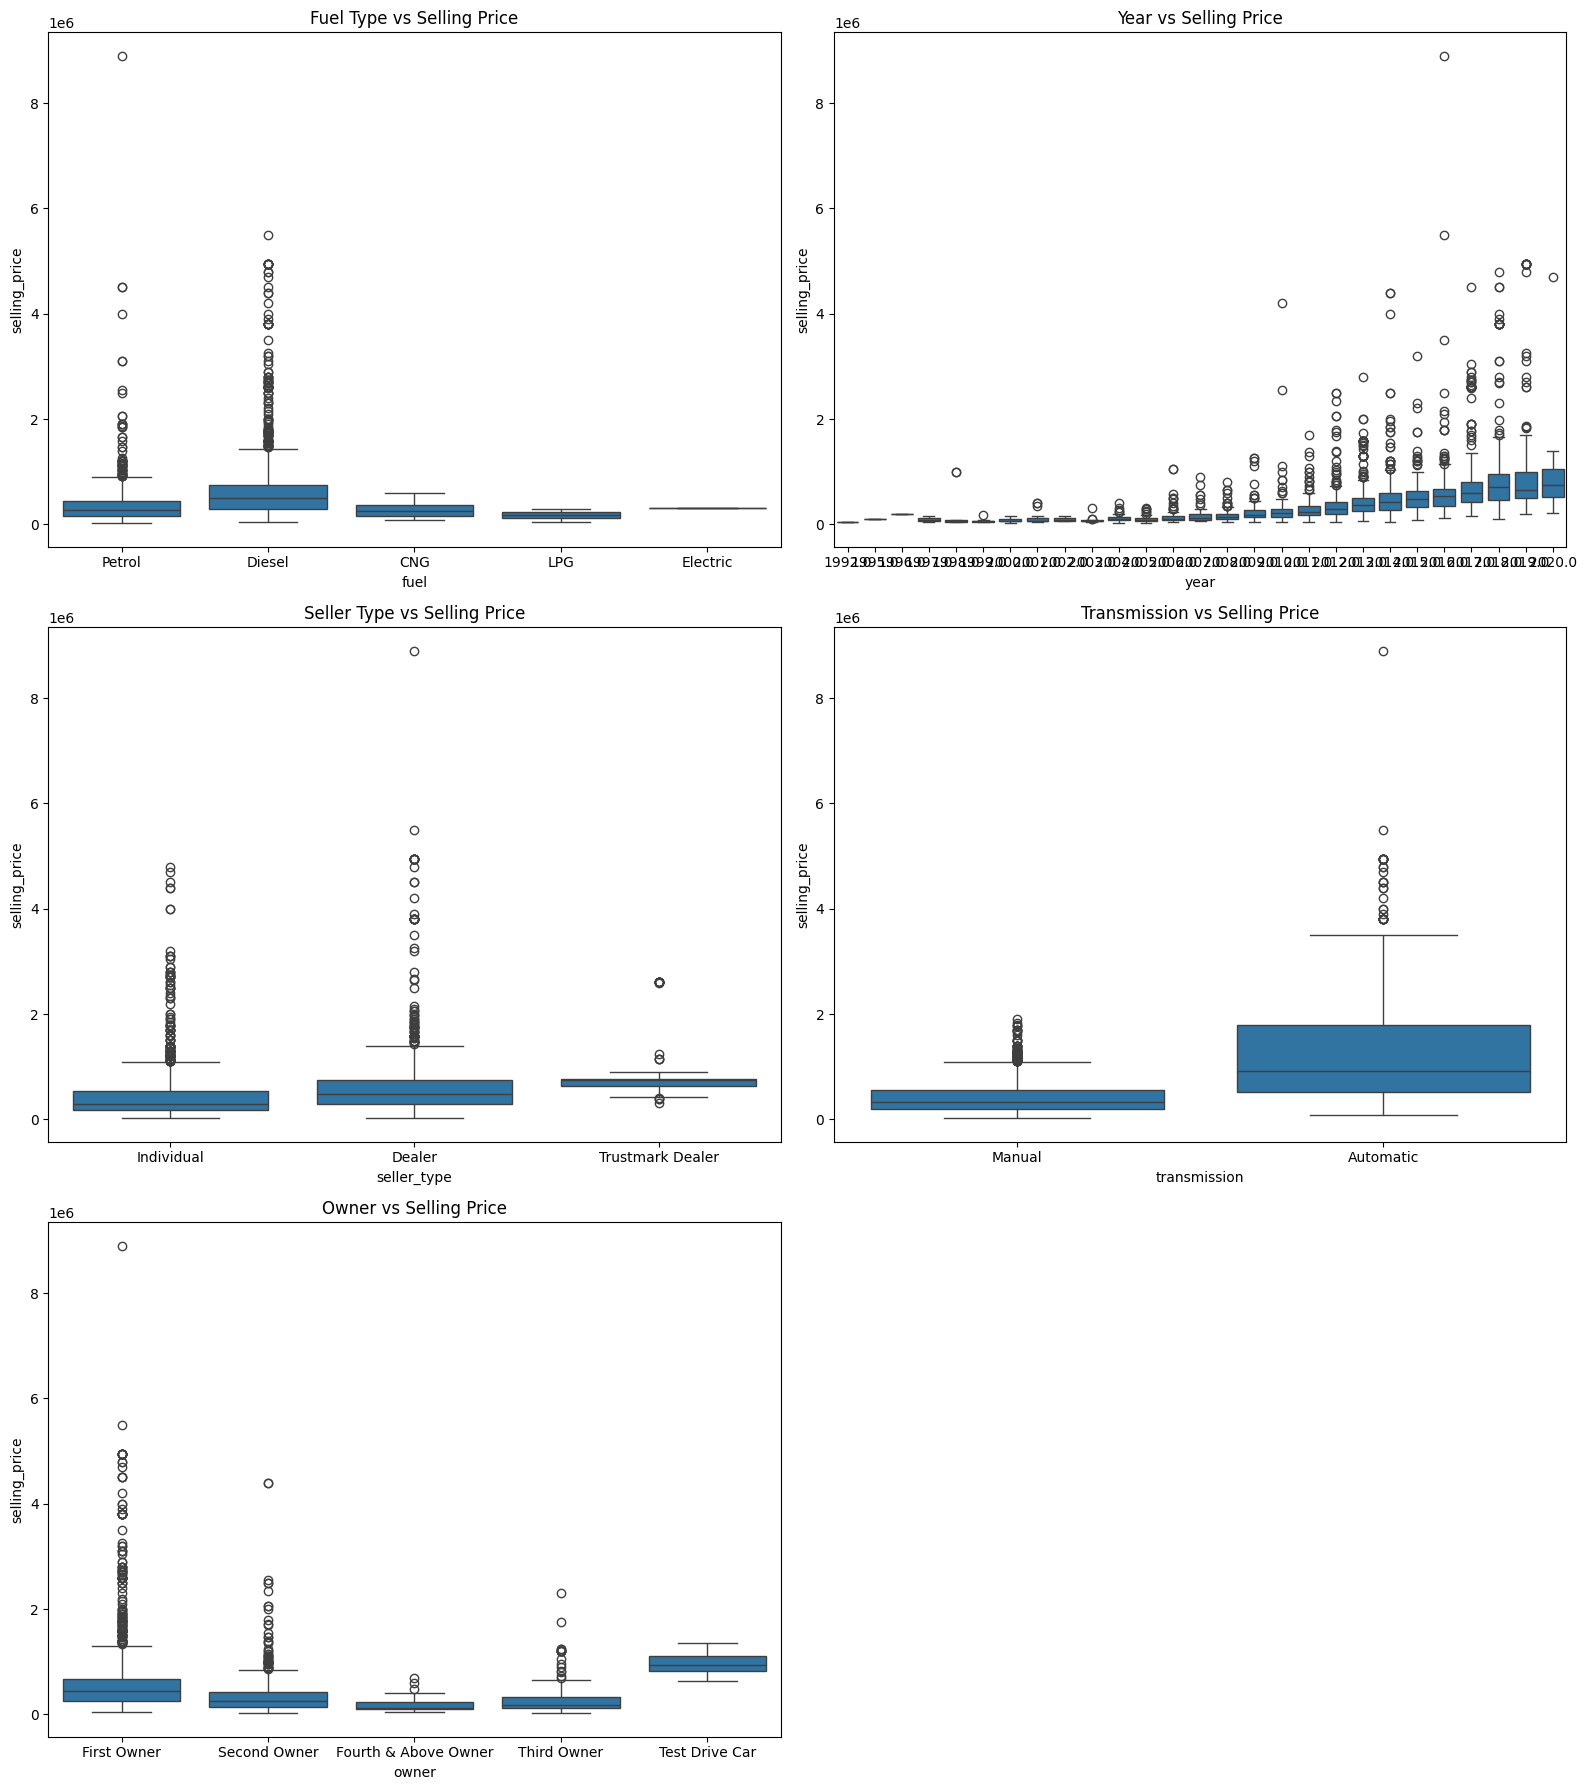

In [11]:
import seaborn as sns
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Box plot: Fuel vs Selling Price
sns.boxplot(x='fuel', y='selling_price', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Fuel Type vs Selling Price')

# Box plot: Year vs Selling Price
sns.boxplot(x='year', y='selling_price', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Year vs Selling Price')

# Box plot: Seller Type vs Selling Price
sns.boxplot(x='seller_type', y='selling_price', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Seller Type vs Selling Price')

# Box plot: Transmission vs Selling Price
sns.boxplot(x='transmission', y='selling_price', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Transmission vs Selling Price')

# Box plot: Owner vs Selling Price
sns.boxplot(x='owner', y='selling_price', data=df_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Owner vs Selling Price')

# Hide the last empty subplot (since we have an odd number of plots)
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Summary of each plot:


1. Fuel Type vs Selling Price:
    
  * Observation: The distribution of selling prices varies across different fuel types. Electric cars tend to have higher median selling prices compared to petrol and diesel cars. Petrol cars may have a wider range of prices, with many cars in the lower to middle price range.
  * Explanation: Electric cars are generally more expensive due to the cost of the technology and the growing demand for eco-friendly vehicles. Petrol cars, being more common and older, have a wider range of selling prices.


2. Year vs Selling Price:

   * Observation: Cars from more recent years tend to have higher selling prices, while older cars generally sell for less. There’s a clear downward trend in prices as the year decreases.

  *  Explanation: Newer cars retain more value and have less wear and tear, making them more expensive. Older cars lose value due to depreciation and potential maintenance issues.


3. Seller Type vs Selling Price:

  * Observation: Dealer-sold cars and trustmark dealer cars tend to have higher selling prices compared to cars sold by individuals. The price distribution for dealers is also more spread out.
  * Explanation: Dealers and trustmark dealer often sell cars that are in better condition and may include additional services like warranties, which increases the price. Individual sellers might sell cars at lower prices due to personal circumstances and lack of professional refurbishments.


4. Transmission vs Selling Price:

  * Observation: Cars with automatic transmission tend to have higher selling prices compared to manual transmission cars. The distribution of prices for automatic cars shows that they generally sell for more.
  * Explanation: Automatic cars are often considered more convenient to drive, especially in urban settings, and might be newer or in higher demand, contributing to higher prices.


5. Owner vs Selling Price:

  * Observation: First-owner cars and test drive cars tend to have higher prices, while prices decrease with the number of previous owners.
  * Explanation: First-owner cars and test drive cars are generally better maintained and perceived as having less wear and tear, which boosts their value.



# Overall Summary:
* Fuel: Electric and diesel cars usually fetch higher prices, with petrol showing a wide range.
* Year: Newer cars are more valuable, showing clear depreciation with age.
* Seller Type: Dealers typically sell at higher prices than individual sellers, likely due to added services.
* Transmission: Automatic cars command higher prices compared to manual ones, reflecting consumer preference for convenience.
* Owner: First-owner and test driven  cars are valued more highly, with each subsequent owner reducing the selling price.


## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [9]:
valid_owners = ['First Owner', 'Second Owner', 'Third Owner']
valid_fuels = ['Diesel', 'Petrol']
valid_seller_types = ['Dealer', 'Individual']
df_filtered = df_cleaned[
    df_cleaned['owner'].isin(valid_owners) &
    df_cleaned['fuel'].isin(valid_fuels) &
    df_cleaned['seller_type'].isin(valid_seller_types)
]
print(f"Length of the data after removing outliers: {len(df_filtered)}")


Length of the data after removing outliers: 3657
